# Project 1: Great Places To Visit And Invest
### A Data Analysis of Great Places To Visit And Invest

#### By Karoly Burgyan, Shayla Badeaux, Christian Cantu
 This project investigates which countries would be good for investment from the perspective of a United States based real estate company or travel agency that is ready to go international in their investments. The project asks the 5 following questions:

1. Is there a correlation between Happiness and Safety?
2. Is there a correlation between Happiness and Cost of Living?
3. Is there a correlation between Happiness and Purchasing Power?
4. Which countries satisfy the priorities of the customer best-- does the customer value happiness, purchasing power, or safety most?
5. Which countries on the priority lists have the most developed infrastructure using GDP as a proxy for infrastructure development?

To answer these five questions, datasets on happiness, cost of living (which included purchasing power), crime (safety), and gross domestic product were combined to reach the conclusions that there are 17 excellent country choices for investment: Australia, Austria, Bahrain, Canada, Denmark, Estonia, Finland, Germany, Israel, Japan, Netherlands, New Zealand, Suadi Arabia, Singapore, Slovenia, Sweden, and United Arab Emirates. And of these, the top 5 are Saudi Arabia, Israel, Slovenia, United Arab Emirates, and Austria.

#### Gathering, Exploring, and Analyzing the Data
1. Datasets for happiness, cost of living (which included purchasing power), and crime (safety) were merged together producing one large merged dataset.<br>
2. The safety index across each country was stated by city and so, to get a rough estimation of the country-wide safety index, the safety index across all the cities in a country were combined into an averaged for the country.
3. The statistical outliers of the merged dataset for the values of happiness, cost of living, purchasing power, and safety were presumed to be errors in measurement and were removed from the dataset.<br>
4. Correlations between happiness and safety, happiness and cost of living, and happiness and purchasing power were calculated using linear regressions. These correlations were 0.35, 0.74, and 0.74 respectively.<br>
5. Because purchasing power had the same correlation to happiness as cost of living and it has more salience in terms of investing from the perspective of real estate companies and travel agencies, the cost of living was determined to be less useful and perhaps redundant in the presence of purchasing power.<br>
6. Z-scores were calculated for the happiness, safety, and purchasing power to assess whether the values varied sufficiently to assess the importance of each metric. If the z-scores were small (e.g. less than 1 standard deviation) for a metric, then it could be assumed that the metric was less relevant in comparison to the other two metrics.<br>
7. 3D plots were created to visualize the z-scores and assess their variability. It turned out that all three metrics varied well beyond 1 standard deviation and, thereby, suggesting that each metric represented a tangible difference across the countries that shouldn't be discarded.<br>
8. From the 3 metrics happiness, safety, and purchasing power, the following 7 different prioritization combinations were considered and a histogram for each prioritization was created:<br>
&emsp;&emsp;i. Equally weighted happiness, safety, and purchasing power<br>
&emsp;&emsp;ii. Prioritized happiness, safety, then purchasing power<br>
&emsp;&emsp;iii. Prioritized happiness, purchasing power, then safety<br>
&emsp;&emsp;iv. Prioritized safety, happiness, then purchasing power<br>
&emsp;&emsp;v. Prioritized safety, purchasing power, then happiness<br>
&emsp;&emsp;vi. Prioritized purchasing power, safety, then happiness<br>
&emsp;&emsp;vii. Prioritized purchasing power, happiness, then safety<br>

9. From those 7 prioritizations, a total of 17 unique countries were collected.<br>
10. A new dataset of Gross Domestic Product by country by year was introduced as a proxy for a comparison of growth of infrastructure among the 17 unique countries.<br>
11. A line plot showing the last 5 years of the top 17 countries revealed that the top 5 growing countries were Saudi Arabia, Israel, Slovenia, United Arab Emirates, and Austria.<br>

### Conclusion
1. Is there a correlation between Happiness and Safety?<br>
Yes, there is a positive correlation between happiness and safety with a Person's R coefficient of 0.35.

2. Is there a correlation between Happiness and Cost of Living?<br>
Yes, there is a positive correlation between happiness and safety with a Person's R coefficient of 0.74.

3. Is there a correlation between Happiness and Purchasing Power?<br>
Yes, there is a positive correlation between happiness and purchasing power with a Person's R coefficient of 0.74.<br>

4. Which countries satisfy the priorities of the customer best-- does the customer value happiness, purchasing power, or safety most?
The answer to this depends on the priorities of the customer that's being served. For :<br>

&emsp;&emsp;i. Equally weighted happiness, safety, and purchasing power: the top 10 countries of interest would be Switzerland, Denmark, Finland, United Arab Emirates, Iceland, Netherlands, Germany, Norway, Austria, Australia.<br>
&emsp;&emsp;ii. Prioritized happiness, safety, then purchasing power: the top 10 countries of interest would be Switzerland, Finland, Denmark, Iceland, Netherlands, Norway, Israel, Austria, United Arab Emirates, Sweden.<br>
&emsp;&emsp;iii. Prioritized happiness, purchasing power, then safety: the top 10 countries of interest would be Switzerland, Finland, Denmark, Sweden, Iceland, Netherlands, Australia, Norway, Germany, Israel.<br>
&emsp;&emsp;iv. Prioritized safety, happiness, then purchasing power: the top 10 countries of interest would be Switzerland, United Arab Emirates, Denmark, Iceland, Finland, Bahrain, Netherlands, Slovenia, Austria, Estonia.<br>
&emsp;&emsp;v. Prioritized safety, purchasing power, then happiness: the top 10 countries of interest would be Switzerland, United Arab Emirates, Denmark, Iceland, Finland, Netherlands, Bahrain, Singapore, Slovenia, Estonia.<br>
&emsp;&emsp;vi. Prioritized purchasing power, safety, then happiness: the top 10 countries of interest would be Switzerland, Denmark, United Arab Emirates, Germany, Australia, Finland, Singapore, Saudi Arabia, Netherlands, Sweden.<br>
&emsp;&emsp;vii. Prioritized purchasing power, happiness, then safety: the top 10 countries of interest would be Switzerland, Denmark, Australia, Germany, Finland, Sweden, Netherlands, United Arab Emirates, Saudi Arabia, Norway.<br>

5. Which countries on the priority lists have the most developed infrastructure using GDP as a proxy for infrastructure development?
Of the top 17 countries discovered in the priority lists above, the top 5 in GDP and thereby presumably infrastructure are Saudi Arabia, Israel, Slovenia, United Arab Emirates, and Austria.<br>

#### The Next Steps
The investment advice to for a real estate company drawn from the results above that's about to go international is to investigate further into the countries listed above in following manner:<br>
investigate the population trends of the country's cities, the real estate trends already present in the cities (for competitive awareness), industry and manufacturing capabilities, cultural and technical institutes and industries. 

The investment advice to for a travel agency drawn from the results above that's about to go international is to investigate further into the countries listed above in following manner:<br>
exchange rates, tourist attractions, civilian attractions (hotels, restaurants, parks, bars, hospitals), and flight costs.


In [1]:
# Dependencies and Setup
import hvplot.pandas
import holoviews
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime
import csv
import mplcursors
from scipy.stats import zscore


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Import API key 
from api_keys import geoapify_key

# # Stretch Jupyter to a greater width
# from IPython.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

# Shows the origin and droplines of 3D plots
def showOrigin(xmin, xmax, ymin, ymax, zmin, zmax):
    ax.scatter3D(0,0,0, color = 'red')
    ax.text(0.01,0.01,0, '(0,0,0)', color = 'red')
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    ax.set_zlim(zmin,zmax)
    plt.plot([xmin, xmax],(0,0),(0,0), color='red', linestyle='dashed', alpha=0.3)
    plt.plot((0,0),[ymin, ymax],(0,0), color='red', linestyle='dashed', alpha=0.3)
    plt.plot((0,0),(0,0),[zmin, zmax], color='red', linestyle='dashed', alpha=0.3)

In [ ]:
# Read in Happiness dataset and Cost of living dataset
hap_df = pd.read_csv('./Resources/2022.csv')
hap_df = hap_df[['Country', 'Happiness score']]
hap_df.columns = ['Country', 'Happiness Score']
cost_df = pd.read_csv('./Resources/Cost_of_Living_Index_2022.csv')
cost_df = cost_df[['Country', 'Local Purchasing Power Index', 'Cost of Living Index']]

print(hap_df.head())
cost_df.head()

In [ ]:
# Merging happiness and cost of living dataframes
HappinessCostOfLiving_df = hap_df.merge(cost_df, how='inner', on='Country')
HappinessCostOfLiving_df.head()

In [ ]:
# Country Count
HappinessCostOfLiving_df.count()

In [ ]:
# Read in Country and Capital dataset to get longitude and latitude
capCoord_df = pd.read_csv('./Resources/country-capitals.csv', on_bad_lines='skip')
print(capCoord_df.columns)
del capCoord_df['CountryCode']
del capCoord_df['ContinentName']
capCoord_df.columns = ['Country', 'Capital', 'Latitude', 'Longitude']
print(capCoord_df.columns)

capCoord_df.head()

In [ ]:
# Merge long and latitude to HappinessCostOfLiving_df
HappinessCostOfLiving_df = HappinessCostOfLiving_df.merge(capCoord_df, how='inner', on='Country')
HappinessCostOfLiving_df.head()

In [ ]:
# Change Happiness Score from object to float
HappinessCostOfLiving_df['Happiness Score'] = HappinessCostOfLiving_df['Happiness Score'].str.replace(",", "").astype('float')
HappinessCostOfLiving_df.dtypes


In [ ]:
# Sort Countries by "Country"
srt_df= HappinessCostOfLiving_df.sort_values(by='Country')
print(HappinessCostOfLiving_df.count())
srt_df.head()

In [ ]:
# Save dataFrame to csv
HappinessCostOfLiving_df.to_csv('./Output/CSVSavePoint/HappinessCostOfLiving_df.csv')

In [ ]:
#********************************************
# Create a dataframe loading point in order to skip steps in the event of having to restart the kernel
HappinessCostOfLiving_df = pd.read_csv('./Output/CSVSavePoint/HappinessCostOfLiving_df.csv')
HappinessCostOfLiving_df_str = "HappinessCostOfLiving_df1"

In [ ]:
# Plot Countries from HappinessCostOfLiving_df on global map
happiestplot = HappinessCostOfLiving_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    color = "Country",
    size = 'Happiness Score',
    frame_width = 700,
    frame_height = 600,
    scale=0.1,
    alpha = 0.5,
    xlabel = "Longitude (Degrees)",
    ylabel = "Latitude (Degrees)"
)

# Save map
holoviews.renderer('bokeh').save(happiestplot, f'./Output/map_all_cities_in_{HappinessCostOfLiving_df_str}', fmt='png')

happiestplot

In [ ]:
# Get top 20 happiest countries
top20Happiness_df = HappinessCostOfLiving_df.sort_values('Happiness Score', ascending=False).head(20)
top20Happiness_df_str = "top20Happiness_df2"
top20Happiness_df

In [ ]:
# Plot all countries in top20Happiness_df
top20HappinessPlot = top20Happiness_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    color = "Country",
    size = 'Happiness Score',
    frame_width = 700,
    frame_height = 600,
    scale=0.15,
    alpha = 0.5,
    xlabel = "Longitude (Degrees)",
    ylabel = "Latitude (Degrees)"
)

# Save map
holoviews.renderer('bokeh').save(top20HappinessPlot, f'./Output/map_all_cities_in_{top20Happiness_df_str}', fmt='png')

top20HappinessPlot

In [ ]:
# Get top 20 least happy countries
bottom20Hap = HappinessCostOfLiving_df.sort_values('Happiness Score').head(20)
bottom20Hap_str = 'bottom20Hap3'
bottom20Hap

In [ ]:
# Plot all countries in top20Happiness_df
bottom20HapPlot = bottom20Hap.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    color = "Country",
    size = 'Happiness Score',
    frame_width = 700,
    frame_height = 600,
    scale=0.3,
    alpha = 0.5,
    xlabel = "Longitude (Degrees)",
    ylabel = "Latitude (Degrees)"
)

# Save map
holoviews.renderer('bokeh').save(bottom20HapPlot, f'./Output/map_all_cities_in_{bottom20Hap_str}', fmt='png')

bottom20HapPlot

In [ ]:
# Display count of HappinessCostOfLiving_df
HappinessCostOfLiving_df.count()

In [ ]:
# Create crime_df
crime_df = pd.read_csv('./Resources/WorldCrimeIndex.csv', encoding='utf-8')

crime_df.head()

In [ ]:
# Separate country from city
df = crime_df['City'].str.split(", ", expand=True)
# crime_df.rename(columns={'City':"Country"})
df.head()

In [ ]:
# Add and fill country column to crime_df
crime_df['Country'] = df[1]

# Delete city column
del crime_df['City']
crime_df = crime_df.groupby('Country').mean()
crime_df.head(30)

In [ ]:
# Merge HappinessCostOfLiving_df with crime_df
HappinessCostOfLivingCrime_df = HappinessCostOfLiving_df.copy().merge(crime_df, how='inner', on='Country')
print(HappinessCostOfLivingCrime_df.count())
HappinessCostOfLivingCrime_df.head()


In [ ]:
# Drop rows that contained NAN
print(HappinessCostOfLivingCrime_df.count())
no_na_df = HappinessCostOfLivingCrime_df.dropna()
no_na_df.count()

In [ ]:
# Save dataFrame to csv
HappinessCostOfLivingCrime_df.to_csv('./Output/CSVSavePoint/HappinessCostOfLivingCrime_df.csv')

In [ ]:
#********************************************
# Create a dataframe loading point in order to skip steps in the event of having to restart the kernel
HappinessCostOfLivingCrime_df = pd.read_csv('./Output/CSVSavePoint/HappinessCostOfLivingCrime_df.csv')

In [ ]:
# Find upper and lower limits of Happiness Score, Cost of Living Index, Safety Index, and Local Purchasing Power Index
quantilesHappCostOfLivingPurchasingPowerSafety = HappinessCostOfLivingCrime_df[['Happiness Score', 'Cost of Living Index', 'Safety Index', 'Local Purchasing Power Index']].quantile([0.25,0.5,0.75])
upperlimit_df = quantilesHappCostOfLivingPurchasingPowerSafety.iloc[2] + 1.5*(quantilesHappCostOfLivingPurchasingPowerSafety.iloc[2] - quantilesHappCostOfLivingPurchasingPowerSafety.iloc[0])
lowerlimit_df = quantilesHappCostOfLivingPurchasingPowerSafety.iloc[0] - 1.5*(quantilesHappCostOfLivingPurchasingPowerSafety.iloc[2] - quantilesHappCostOfLivingPurchasingPowerSafety.iloc[0])

# Removing outliers
print(HappinessCostOfLivingCrime_df.count())
for x in upperlimit_df.index:
    HappinessCostOfLivingCrime_df[x] = HappinessCostOfLivingCrime_df[x].loc[(HappinessCostOfLivingCrime_df[x] >= lowerlimit_df[x]) & (HappinessCostOfLivingCrime_df[x] <= upperlimit_df[x])]
    HappinessCostOfLivingCrime_df = HappinessCostOfLivingCrime_df[HappinessCostOfLivingCrime_df[x].notna()]
HappinessCostOfLivingCrime_df.count()

In [ ]:
# Find linear regression parameters Cost of Living Index by Happiness Score
(m, y, r, p, std) = linregress(HappinessCostOfLivingCrime_df['Cost of Living Index'], HappinessCostOfLivingCrime_df['Happiness Score'])

# Calculate values for linear regression line
yregressLin = m * HappinessCostOfLivingCrime_df['Cost of Living Index'] + y

# Plot HappinessCostOfLivingCrime_df
HappinessCostOfLivingCrime_df.plot(kind='scatter', x = 'Cost of Living Index', y = 'Happiness Score')

# Create annotation text
equation = f"y = {m:.2f}x + {y:.2f}"

# Plot linear regression line
plt.plot(HappinessCostOfLivingCrime_df['Cost of Living Index'], yregressLin, color='red')
plt.annotate(equation, (52, 4500), color='red', size = 14)
plt.annotate(f"Pearson's R Coefficient: {r:.2f}", (52, 5000), color='green', size = 12)
plt.title('Happiness Score By Cost Of Living')
fig = plt.gcf()
plt.show()

In [ ]:
# Create png name
figureTitle = 'HappinessCostLiving4'

# Save the figure
fig.savefig(f"Output/{figureTitle}.png")


In [ ]:
# Find linear regression parameters Safety Index by Happiness Score
(m, y, r, p, std) = linregress(HappinessCostOfLivingCrime_df['Safety Index'], HappinessCostOfLivingCrime_df['Happiness Score'])

# Calculate values for linear regression line
yregressLin = m * HappinessCostOfLivingCrime_df['Safety Index'] + y

# Plot HappinessCostOfLivingCrime_df
HappinessCostOfLivingCrime_df.plot(kind='scatter', x = 'Safety Index', y = 'Happiness Score')

# Create annotation text
equation = f"y = {m:.2f}x + {y:.2f}"

# Plot linear regression line
print(f"Pearson's R Coefficient: {r}")
plt.plot(HappinessCostOfLivingCrime_df['Safety Index'], yregressLin, color='red')
plt.annotate(equation, (15, 7000), color='red', size = 14)
plt.annotate(f"Pearson's R Coefficient: {r:.2f}", (15, 7600), color='green', size = 12)
plt.title('Happiness Score By Safety Index')
fig = plt.gcf()
plt.show()

In [ ]:
# Create png name
figureTitle = 'HappinessSafety5'

# Save the figure
fig.savefig(f"Output/{figureTitle}.png")

In [ ]:
# Find linear regression parameters Local Purchasing Power Index by Happiness Score
(m, y, r, p, std) = linregress(HappinessCostOfLivingCrime_df['Local Purchasing Power Index'], HappinessCostOfLivingCrime_df['Happiness Score'])

# Calculate values for linear regression line
yregressLin = m * HappinessCostOfLivingCrime_df['Local Purchasing Power Index'] + y

# Plot HappinessCostOfLivingCrime_df
HappinessCostOfLivingCrime_df.plot(kind='scatter', x = 'Local Purchasing Power Index', y = 'Happiness Score')

# Create annotation text
equation = f"y = {m:.2f}x + {y:.2f}"

# Plot linear regression line
print(f"Pearson's R Coefficient: {r}")
plt.plot(HappinessCostOfLivingCrime_df['Local Purchasing Power Index'], yregressLin, color='red')
plt.annotate(equation, (55, 4000), color='red', size = 14)
plt.annotate(f"Pearson's R Coefficient: {r:.2f}", (55, 4500), color='green', size = 12)
plt.title('Happiness Score By Local Purchasing Power')
fig = plt.gcf()
plt.show()

In [ ]:
# Create png name
figureTitle = 'HappinessPurchasing6'

# Save the figure
fig.savefig(f"Output/{figureTitle}.png")


In [2]:
#********************************************
# Create a dataframe loading point in order to skip steps in the event of having to restart the kernel
HappinessCostOfLivingCrime_df = pd.read_csv('./Output/CSVSavePoint/HappinessCostOfLivingCrime_df.csv')

<IPython.core.display.Javascript object>


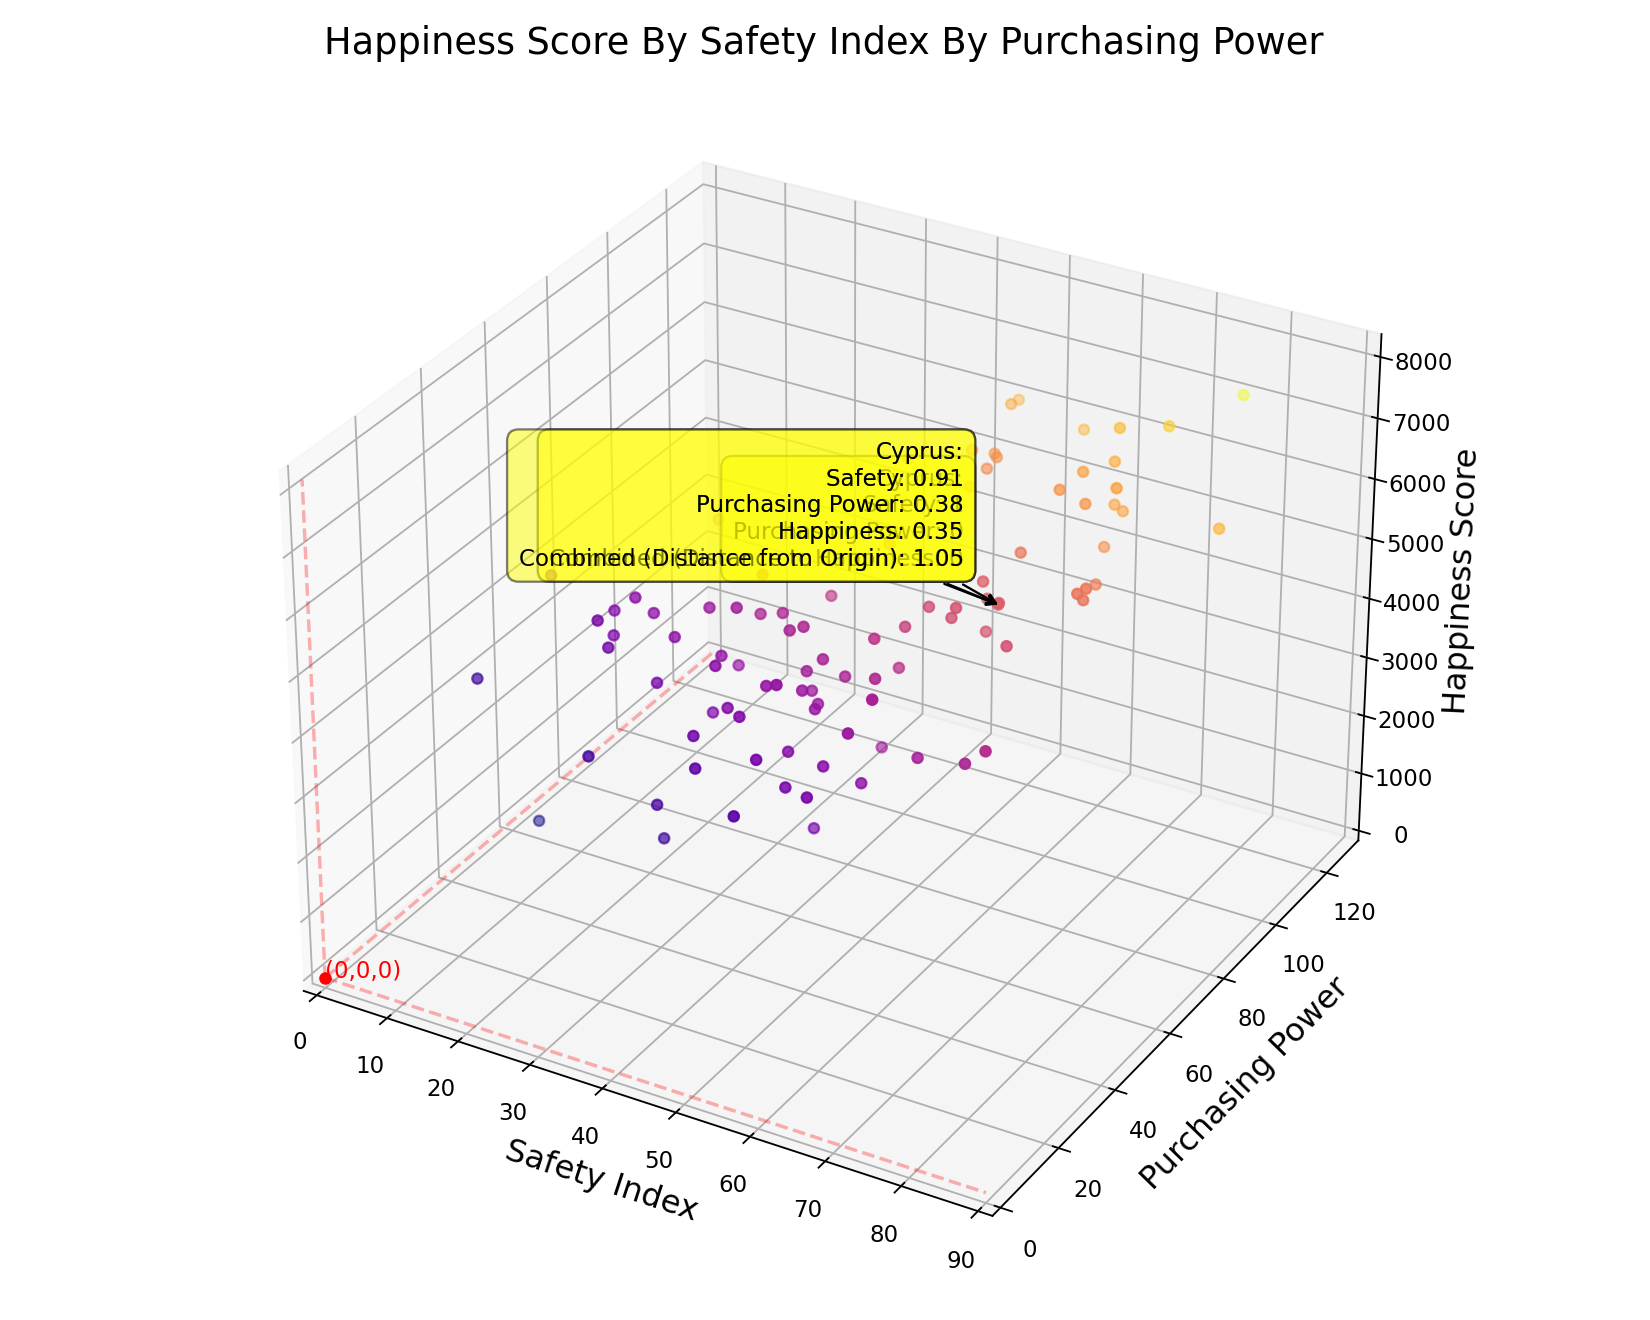

In [3]:
%matplotlib notebook

# Plot Happiness by Local Purchasing Power Index by Safety Index
fig = plt.figure(figsize=(10,8), tight_layout=True)
ax = fig.add_subplot(projection='3d')
x = HappinessCostOfLivingCrime_df['Safety Index']
xlabel = 'Safety Index'
y = HappinessCostOfLivingCrime_df['Local Purchasing Power Index']
ylabel = 'Purchasing Power'
z = HappinessCostOfLivingCrime_df['Happiness Score']
zlabel = 'Happiness Score'

# Calculate coloration
topHap = HappinessCostOfLivingCrime_df['Happiness Score'].values.max()
topPurch = HappinessCostOfLivingCrime_df['Local Purchasing Power Index'].values.max()
topSafety = HappinessCostOfLivingCrime_df['Safety Index'].values.max()
red = HappinessCostOfLivingCrime_df['Happiness Score']/topHap
green = HappinessCostOfLivingCrime_df['Local Purchasing Power Index']/topSafety
blue = HappinessCostOfLivingCrime_df['Safety Index']/topPurch 
triple = (red+ green+blue)/3

ax.scatter(x, y, z, cmap='plasma', c=triple)
ax.set_xlabel(xlabel, fontsize=14)
ax.set_ylabel(ylabel, fontsize=14)
ax.set_zlabel(zlabel, fontsize=14)
plt.subplots_adjust(right=0.5, bottom=0.5)
plt.title('Happiness Score By Safety Index By Purchasing Power', fontsize=16)

# Show origin
xmin = 0
xmax = 90
ymin = 0
ymax = 130
zmin = 0
zmax = 8200
showOrigin(xmin, xmax, ymin, ymax, zmin, zmax)

# Hover cursor
country = HappinessCostOfLivingCrime_df['Country']
safety = x
happiness = y
purchasingPower = z
cursor = mplcursors.cursor(hover=True)
cursor.connect("add", lambda sel: sel.annotation.set(text = 
    f"{country[sel.target.index]}:\nSafety: {safety[sel.target.index]:.0f}\nPurchasing Power: {purchasingPower[sel.target.index]:.0f}\nHappiness: {happiness[sel.target.index]:.0f}"))

fig1 = plt.gcf()
plt.show()

In [4]:
# Create png name
figureTitle = 'HappinessPurchSafety3D7'

# Save the figure
fig1.savefig(f"Output/{figureTitle}.png")

In [5]:
# Find minimum values for Happiness Score, Local Purchasing Power Index, and Safety Index  
bottomHap = HappinessCostOfLivingCrime_df['Happiness Score'].min()
bottomPurch = HappinessCostOfLivingCrime_df['Local Purchasing Power Index'].min()
bottompSafety = HappinessCostOfLivingCrime_df['Safety Index'].min()

# Find maximum values for Happiness Score, Local Purchasing Power Index, and Safety Index  
topHap = HappinessCostOfLivingCrime_df['Happiness Score'].max()
topPurch = HappinessCostOfLivingCrime_df['Local Purchasing Power Index'].max()
topSafety = HappinessCostOfLivingCrime_df['Safety Index'].max()

# Create columns for normalized values for Happiness Score, Local Purchasing Power Index, and Safety Index  
HappinessCostOfLivingCrime_df['Normalized Happiness'] = (HappinessCostOfLivingCrime_df['Happiness Score'] - bottomHap) / (topHap - bottomHap)
HappinessCostOfLivingCrime_df['Normalized Local Purchasing Power'] = (HappinessCostOfLivingCrime_df['Local Purchasing Power Index'] - bottomPurch) / (topPurch - bottomPurch)
HappinessCostOfLivingCrime_df['Normalized Safety'] = (HappinessCostOfLivingCrime_df['Safety Index'] - bottompSafety) / (topSafety - bottompSafety)
HappinessCostOfLivingCrime_df.head()


,Unnamed: 0.1,Unnamed: 0,Country,Happiness Score,Local Purchasing Power Index,Cost of Living Index,Capital,Latitude,Longitude,Rank,Crime Index,Safety Index,Normalized Happiness,Normalized Local Purchasing Power,Normalized Safety
0,0,0,Finland,7821.0,91.02,73.20,Helsinki,60.166667,24.933333,380.333333,27.763333,72.236667,1.000000,0.748671,0.812908
1,1,1,Denmark,7636.0,99.45,84.12,Copenhagen,55.666667,12.583333,411.000000,24.270000,75.730000,0.965848,0.825940,0.863423
2,2,2,Iceland,7557.0,77.06,94.86,Reykjavik,64.150000,-21.950000,421.000000,23.020000,76.980000,0.951265,0.620715,0.881498
3,3,3,Switzerland,7512.0,118.44,123.35,Bern,46.916667,7.466667,427.833333,21.156667,78.843333,0.942957,1.000000,0.908442
4,4,4,Netherlands,7415.0,87.99,75.66,Amsterdam,52.350000,4.916667,385.500000,27.235000,72.765000,0.925051,0.720898,0.820548


<IPython.core.display.Javascript object>


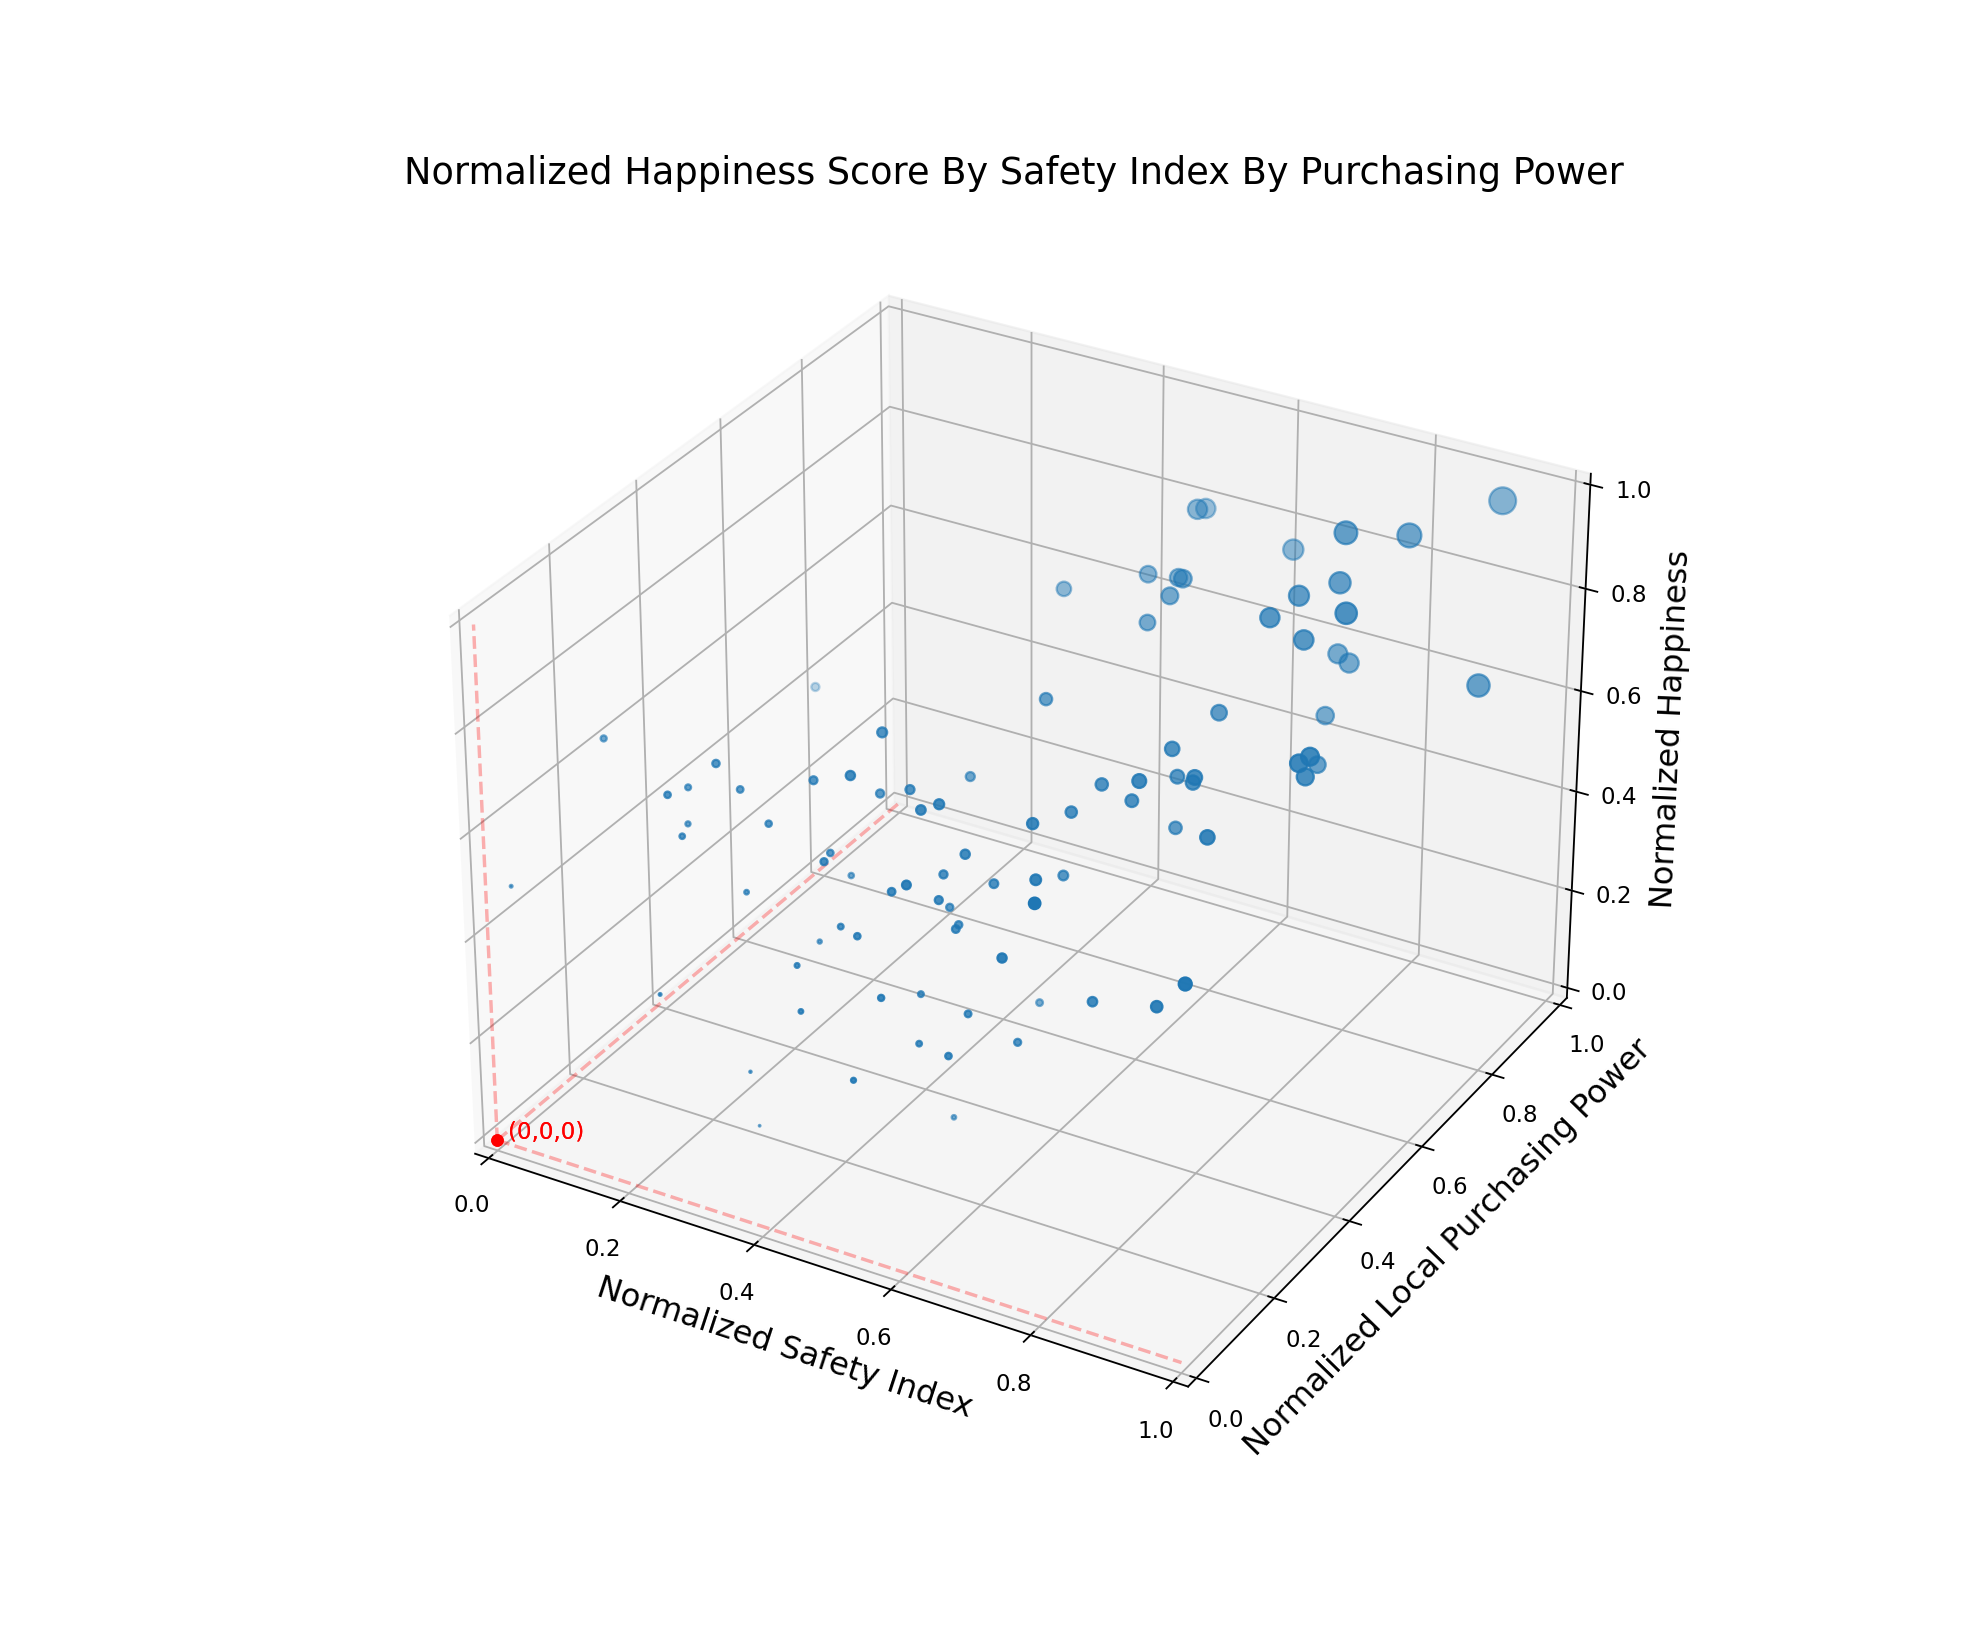

C:\Users\T852\anaconda3\envs\dev\lib\site-packages\mplcursors\_pick_info.py:55: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  paths = scatter.__wrapped__(*args, **kwargs)


In [6]:
%matplotlib notebook

# Create weights for combining normalized Happiness Score, Local Purchasing Power Index, and Safety Index into a single value
weightHap = 1
weightPurch = 1
weightSafety = 1

# Create a new column by combining the three metrics (Normalized Happiness, Safety, Purchasing Power) into one metric
HappinessCostOfLivingCrime_df['Equally Weighted Safety, Purchasing, and Happiness'] = np.sqrt((HappinessCostOfLivingCrime_df['Normalized Safety'] * weightSafety)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Local Purchasing Power'] * weightPurch)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Happiness'] * weightHap)**2)

# Plot normalized-combined metric 'Equally Weighted Safety, Purchasing, and Happiness'
plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

# print(HappinessCostOfLivingCrime_df)
# Find min
minimumEquallyWeighted = HappinessCostOfLivingCrime_df['Equally Weighted Safety, Purchasing, and Happiness'].min()

visualFactor = 40
x = HappinessCostOfLivingCrime_df['Normalized Safety']
y = HappinessCostOfLivingCrime_df['Normalized Local Purchasing Power']
z = HappinessCostOfLivingCrime_df['Normalized Happiness']
size = HappinessCostOfLivingCrime_df['Equally Weighted Safety, Purchasing, and Happiness']

# Size of datapoint will increase with distance from origin (0,0,0)
fg = ax.scatter3D(x, y, z, 
                  s = visualFactor * (size - minimumEquallyWeighted)**3,
                  cmap='plasma'
                  )

# Labels
ax.set_title('Normalized Happiness Score By Safety Index By Purchasing Power', fontsize=16)
ax.scatter3D(0,0,0, color = 'red')
ax.text(0.01,0.01,0, '(0,0,0)', color = 'red')
ax.set_xlabel('Normalized Safety Index', fontsize=14)
ax.set_ylabel('Normalized Local Purchasing Power', fontsize=14)
ax.set_zlabel('Normalized Happiness', fontsize=14)


# Show origin
xmin = 0
xmax = 1
ymin = 0
ymax = 1
zmin = 0
zmax = 1
showOrigin(xmin, xmax, ymin, ymax, zmin, zmax)

# Hover cursor
labels = HappinessCostOfLivingCrime_df['Country']
country = HappinessCostOfLivingCrime_df['Country']
safety = x
happiness = y
purchasingPower = z
cursor = mplcursors.cursor(hover=True)
cursor.connect("add", lambda sel: sel.annotation.set(text = 
    f"{country[sel.target.index]}:\nSafety: {safety[sel.target.index]:.2f}\nPurchasing Power: {purchasingPower[sel.target.index]:.2f}\nHappiness: {happiness[sel.target.index]:.2f}\nCombined (Distance to Origin): {size[sel.target.index]:.2f}"))

fig1 = plt.gcf()
plt.show()

In [7]:
# Create png name
figureTitle = 'NormalizedHappinessPurchSafety3D8'

# Save the figure
fig1.savefig(f"Output/{figureTitle}.png")

In [ ]:
# Save dataFrame to csv
HappinessCostOfLivingCrime_df.to_csv('./Output/CSVSavePoint/HappinessCostOfLivingCrime_dfNorm.csv')

In [ ]:
#********************************************
# Create a dataframe loading point in order to skip steps in the event of having to restart the kernel
HappinessCostOfLivingCrime_df = pd.read_csv('./Output/CSVSavePoint/HappinessCostOfLivingCrime_dfNorm.csv')

In [8]:
# Calculate and create columns for Z-scores of Happiness Score, Local Purchasing Power Index, and Safety Index
HappinessCostOfLivingCrime_df['Z-Score Happiness Score'] = zscore(HappinessCostOfLivingCrime_df['Happiness Score'])
HappinessCostOfLivingCrime_df['Z-Score Safety Index'] = zscore(HappinessCostOfLivingCrime_df['Safety Index'])
HappinessCostOfLivingCrime_df['Z-Score Local Purchasing Power'] = zscore(HappinessCostOfLivingCrime_df['Local Purchasing Power Index'])
HappinessCostOfLivingCrime_df.head()

,Unnamed: 0.1,Unnamed: 0,Country,Happiness Score,Local Purchasing Power Index,Cost of Living Index,Capital,Latitude,Longitude,Rank,Crime Index,Safety Index,Normalized Happiness,Normalized Local Purchasing Power,Normalized Safety,"Equally Weighted Safety, Purchasing, and Happiness",Z-Score Happiness Score,Z-Score Safety Index,Z-Score Local Purchasing Power
0,0,0,Finland,7821.0,91.02,73.20,Helsinki,60.166667,24.933333,380.333333,27.763333,72.236667,1.000000,0.748671,0.812908,1.490412,1.878166,1.117736,1.605072
1,1,1,Denmark,7636.0,99.45,84.12,Copenhagen,55.666667,12.583333,411.000000,24.270000,75.730000,0.965848,0.825940,0.863423,1.536404,1.705324,1.347331,1.919171
2,2,2,Iceland,7557.0,77.06,94.86,Reykjavik,64.150000,-21.950000,421.000000,23.020000,76.980000,0.951265,0.620715,0.881498,1.437787,1.631516,1.429486,1.084926
3,3,3,Switzerland,7512.0,118.44,123.35,Bern,46.916667,7.466667,427.833333,21.156667,78.843333,0.942957,1.000000,0.908442,1.647555,1.589473,1.551951,2.626732
4,4,4,Netherlands,7415.0,87.99,75.66,Amsterdam,52.350000,4.916667,385.500000,27.235000,72.765000,0.925051,0.720898,0.820548,1.431332,1.498848,1.152460,1.492175


<IPython.core.display.Javascript object>


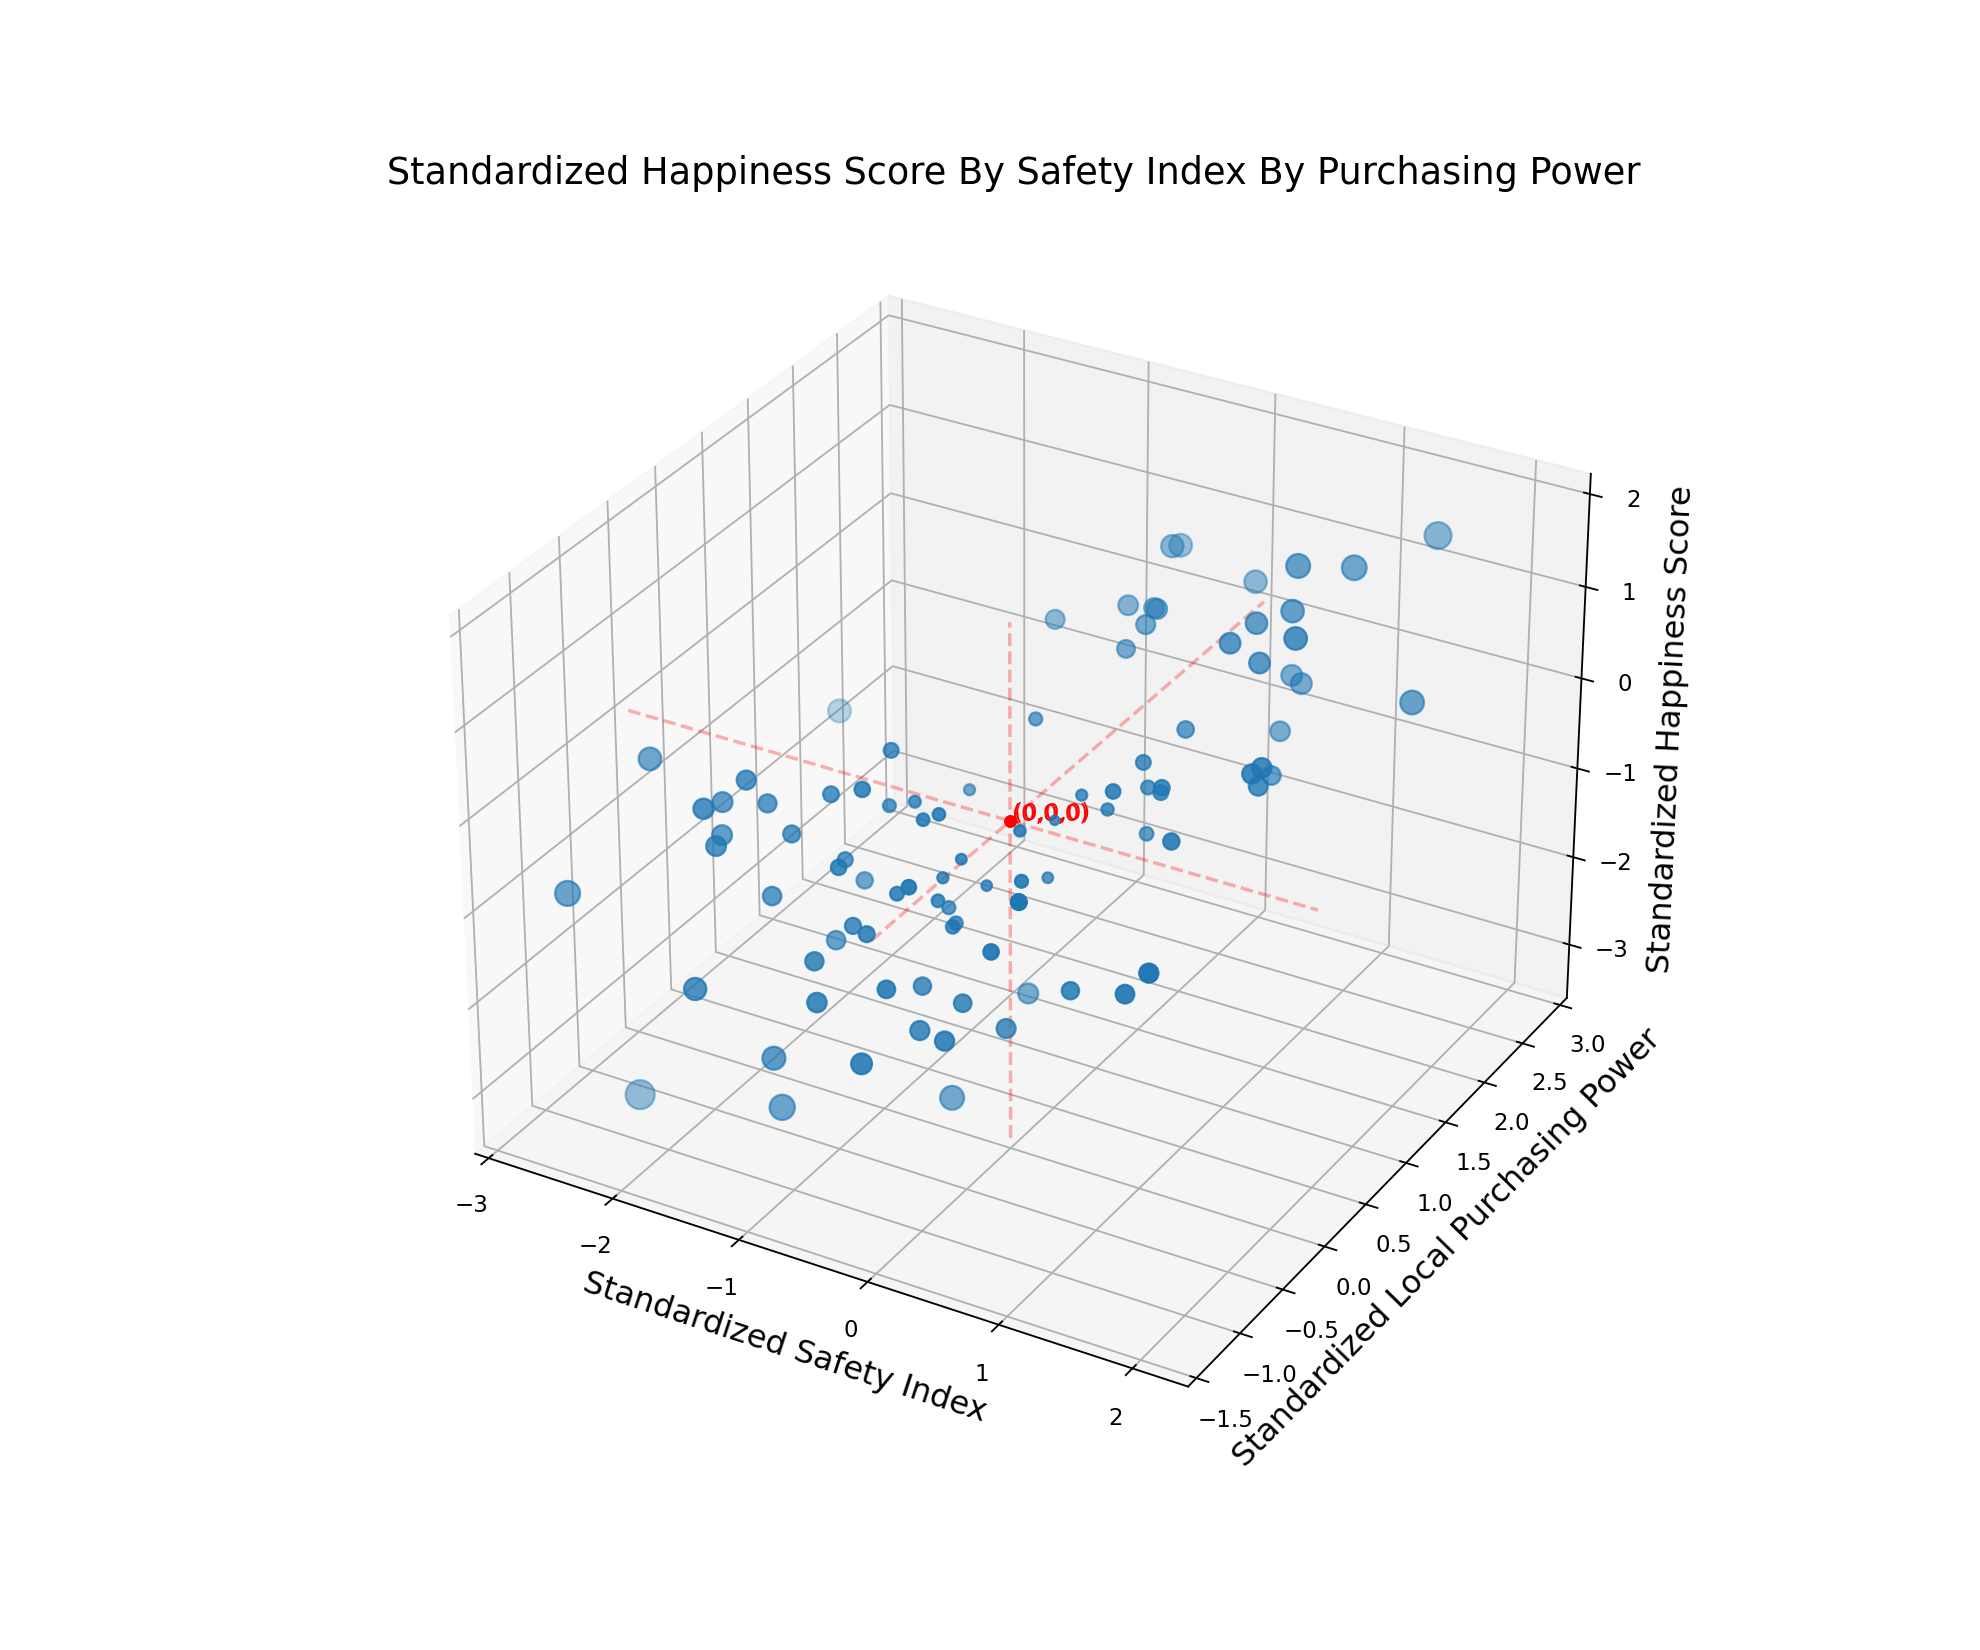

C:\Users\T852\anaconda3\envs\dev\lib\site-packages\mplcursors\_pick_info.py:55: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  paths = scatter.__wrapped__(*args, **kwargs)


In [9]:
%matplotlib notebook

# Create weights for combining Z-score Happiness Score, Z-score Local Purchasing Power Index, and Z-score Safety Index into a single value
weightHap = 1
weightPurch = 1
weightSafety = 1

# Create a new column by combining the three metrics (Normalized Happiness, Safety, Purchasing Power) into one metric
HappinessCostOfLivingCrime_df['Equally Weighted Z-Score Safety, Purchasing, and Happiness'] = np.sqrt((HappinessCostOfLivingCrime_df['Z-Score Safety Index'] * weightSafety)**2 + 
                            (HappinessCostOfLivingCrime_df['Z-Score Local Purchasing Power'] * weightPurch)**2 + 
                            (HappinessCostOfLivingCrime_df['Z-Score Happiness Score'] * weightHap)**2)

# Plot normalized-combined metric 'Equally Weighted Safety, Purchasing, and Happiness'
plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

# print(HappinessCostOfLivingCrime_df)
# Find min
minimumEquallyWeightedZScore = HappinessCostOfLivingCrime_df['Equally Weighted Z-Score Safety, Purchasing, and Happiness'].min()

visualFactor = 40
x = HappinessCostOfLivingCrime_df['Z-Score Safety Index']
y = HappinessCostOfLivingCrime_df['Z-Score Local Purchasing Power']
z = HappinessCostOfLivingCrime_df['Z-Score Happiness Score']
size = HappinessCostOfLivingCrime_df['Equally Weighted Z-Score Safety, Purchasing, and Happiness']

# Size of datapoint will increase with distance from origin (0,0,0)
fg = ax.scatter3D(x, y, z, s = size * visualFactor, cmap='plasma')

# Labels
ax.set_title('Standardized Happiness Score By Safety Index By Purchasing Power', fontsize=16)
ax.set_xlabel('Standardized Safety Index', fontsize=14)
ax.set_ylabel('Standardized Local Purchasing Power', fontsize=14)
ax.set_zlabel('Standardized Happiness Score', fontsize=14)
ax.scatter3D(0,0,0, color = 'red')
ax.text(0.02,0.02,0, '(0,0,0)', color = 'red')


# Show origin
xmin = -3
xmax = 2.3
ymin = -1.5
ymax = 3
zmin = -3.5
zmax = 2.1
showOrigin(xmin, xmax, ymin, ymax, zmin, zmax)

# Hover cursor
labels = HappinessCostOfLivingCrime_df['Country']
country = HappinessCostOfLivingCrime_df['Country']
safety = x
happiness = y
purchasingPower = z
combined = size
cursor = mplcursors.cursor(hover=True)
cursor.connect("add", lambda sel: sel.annotation.set(text = 
    f"{country[sel.target.index]}:\nSafety: {safety[sel.target.index]:.2f}\nPurchasing Power: {purchasingPower[sel.target.index]:.2f}\nHappiness: {happiness[sel.target.index]:.2f}\nCombined (Distance from Origin): {combined[sel.target.index]:.2f}"))


fig1 = plt.gcf()
plt.show()

In [10]:
# Create png name
figureTitle = 'StandardizedHappinessPurchSafety3D8b'

# Save the figure
fig1.savefig(f"Output/{figureTitle}.png")

In [ ]:
# Save dataFrame to csv
HappinessCostOfLivingCrime_df.to_csv('./Output/CSVSavePoint/HappinessCostOfLivingCrime_dfZScore.csv')

In [ ]:
#********************************************
# Create a dataframe loading point in order to skip steps in the event of having to restart the kernel
HappinessCostOfLivingCrime_df = pd.read_csv('./Output/CSVSavePoint/HappinessCostOfLivingCrime_dfZScore.csv')

In [ ]:
HappinessCostOfLivingCrime_df.sort_values('Z-Score Local Purchasing Power', ascending=False).head(30)

In [ ]:
HappinessCostOfLivingCrime_df.head()

In [ ]:
top10EquallyWeighted = HappinessCostOfLivingCrime_df.sort_values('Equally Weighted Safety, Purchasing, and Happiness', ascending=False).head(10)
top10EquallyWeighted

In [ ]:
#Equally Weighted
%matplotlib notebook
x = top10EquallyWeighted['Country']
height = top10EquallyWeighted['Equally Weighted Safety, Purchasing, and Happiness']


# collecting countries
countriesOfInterestSet = set()
for q in x:
    countriesOfInterestSet.add(q)
fig, ax = plt.subplots()
ax.bar(x, height, zorder=5) 
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=.85, left=0.15, bottom=0.35)
plt.title('Equally Weighted Safety, Purchasing, and Happiness', fontsize=15)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Normalized Score', fontsize=14)
plt.ylim(1.25, 1.75)
plt.grid(zorder=0)
fig1 = plt.gcf()
plt.show()

In [ ]:
# Create png name
figureTitle = 'EquallyWeightedSafPurchHap9'

# Save the figure
fig1.savefig(f"Output/{figureTitle}.png")

In [ ]:
#Happiness 3, purch 2, safety 1
%matplotlib notebook
weightHap = 3
weightPurch = 2
weightSafety = 1
HappinessCostOfLivingCrime_df['Prioritized Happiness, Purchasing, then Safety'] = np.sqrt((HappinessCostOfLivingCrime_df['Normalized Safety'] * weightSafety)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Local Purchasing Power'] * weightPurch)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Happiness'] * weightHap)**2)
top10Prioritized = HappinessCostOfLivingCrime_df.sort_values('Prioritized Happiness, Purchasing, then Safety', 
                                               ascending=False).head(10)
x = top10Prioritized['Country']
height = top10Prioritized['Prioritized Happiness, Purchasing, then Safety']


# collecting countries
for q in x:     
    countriesOfInterestSet.add(q)

fig, ax = plt.subplots()
ax.bar(x, height, zorder=5) 
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=.85, left=0.15, bottom=0.35)
plt.title('Prioritized Happiness, Purchasing, then Safety', fontsize=15)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Normalized Score', fontsize=14)
plt.ylim(3, 3.6)
plt.grid(zorder=0)
fig1 = plt.gcf()
plt.show()

In [ ]:
# Create png name
figureTitle = 'PrioritizedHapPurchSaf10'

# Save the figure
fig1.savefig(f"Output/{figureTitle}.png")

In [ ]:
#Happiness 3, purch 1, safety 2
%matplotlib notebook
weightHap = 3
weightPurch = 1
weightSafety = 2
HappinessCostOfLivingCrime_df['Prioritized Happiness, Safety, then Purchasing'] = np.sqrt((HappinessCostOfLivingCrime_df['Normalized Safety'] * weightSafety)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Local Purchasing Power'] * weightPurch)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Happiness'] * weightHap)**2)
top10Prioritized = HappinessCostOfLivingCrime_df.sort_values('Prioritized Happiness, Safety, then Purchasing', 
                                               ascending=False).head(10)
# print(top10Prioritized[['Country','Prioritized Happiness, Safety, then Purchasing']])
x = top10Prioritized['Country']
height = top10Prioritized['Prioritized Happiness, Safety, then Purchasing']


# collecting countries
for q in x:     
    countriesOfInterestSet.add(q)

fig, ax = plt.subplots()
ax.bar(x, height, zorder=5) 
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=.85, left=0.15, bottom=0.35)
plt.title('Prioritized Happiness, Safety, then Purchasing', fontsize=15)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Normalized Score', fontsize=14)
plt.ylim(3, 3.6)
plt.grid(zorder=0)
fig1 = plt.gcf()
plt.show()

In [ ]:
# Create png name
figureTitle = 'PrioritizedHapSafPurch11'

# Save the figure
fig1.savefig(f"Output/{figureTitle}.png")

In [ ]:
#Happiness 2, purch 3, safety 1
%matplotlib notebook
weightHap = 2
weightPurch = 3
weightSafety = 1
HappinessCostOfLivingCrime_df['Prioritized Purchasing, Happiness, then Safety'] = np.sqrt((HappinessCostOfLivingCrime_df['Normalized Safety'] * weightSafety)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Local Purchasing Power'] * weightPurch)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Happiness'] * weightHap)**2)
top10Prioritized = HappinessCostOfLivingCrime_df.sort_values('Prioritized Purchasing, Happiness, then Safety', 
                                               ascending=False).head(10)
# print(HappinessCostOfLivingCrime_df.count())
x = top10Prioritized['Country']
height = top10Prioritized['Prioritized Purchasing, Happiness, then Safety']

# collecting countries
for q in x:     
    countriesOfInterestSet.add(q)

fig, ax = plt.subplots()
ax.bar(x, height, zorder=5) 
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=.85, left=0.15, bottom=0.35)
plt.title('Prioritized Purchasing, Happiness, then Safety', fontsize=15)
plt.xlabel('Country', fontsize=14)
plt.ylim(2.8, 3.7)
plt.ylabel('Normalized Score', fontsize=14)
plt.grid(zorder=0)
print(countriesOfInterestSet)
fig1 = plt.gcf()
plt.show()

In [ ]:
# Create png name
figureTitle = 'PrioritizedPurchHapSaf12'

# Save the figure
fig1.savefig(f"Output/{figureTitle}.png")

In [ ]:
#Happiness 1, purch 3, safety 2
%matplotlib notebook
weightHap = 1
weightPurch = 3
weightSafety = 2
HappinessCostOfLivingCrime_df['Prioritized Purchasing, Safety, then Happiness'] = np.sqrt((HappinessCostOfLivingCrime_df['Normalized Safety'] * weightSafety)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Local Purchasing Power'] * weightPurch)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Happiness'] * weightHap)**2)
top10Prioritized = HappinessCostOfLivingCrime_df.sort_values('Prioritized Purchasing, Safety, then Happiness', 
                                               ascending=False).head(10)
# print(HappinessCostOfLivingCrime_df.count())
x = top10Prioritized['Country']
height = top10Prioritized['Prioritized Purchasing, Safety, then Happiness']

# collecting countries
for q in x:     
    countriesOfInterestSet.add(q)

fig, ax = plt.subplots()
ax.bar(x, height, zorder=5) 
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=.85, left=0.15, bottom=0.35)
plt.title('Prioritized Purchasing, Safety, then Happiness', fontsize=15)
plt.xlabel('Country', fontsize=14)
plt.ylim(2.8, 3.7)
plt.ylabel('Normalized Score', fontsize=14)
plt.grid(zorder=0)
fig1 = plt.gcf()
plt.show()

In [ ]:
# Create png name
figureTitle = 'PrioritizedPurchSafHap13'

# Save the figure
fig1.savefig(f"Output/{figureTitle}.png")

In [ ]:
#Happiness 1, purch 2, safety 3
%matplotlib notebook
weightHap = 1
weightPurch = 2
weightSafety = 3
HappinessCostOfLivingCrime_df['Prioritized Safety, Purchasing, then Happiness'] = np.sqrt((HappinessCostOfLivingCrime_df['Normalized Safety'] * weightSafety)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Local Purchasing Power'] * weightPurch)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Happiness'] * weightHap)**2)
top10Prioritized = HappinessCostOfLivingCrime_df.sort_values('Prioritized Safety, Purchasing, then Happiness', 
                                               ascending=False).head(10)
# print(HappinessCostOfLivingCrime_df.count())
x = top10Prioritized['Country']
height = top10Prioritized['Prioritized Safety, Purchasing, then Happiness']

# collecting countries
for q in x:     
    countriesOfInterestSet.add(q)

fig, ax = plt.subplots()
ax.bar(x, height, zorder=5) 
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=.85, left=0.15, bottom=0.35)
plt.title('Prioritized Safety, Purchasing, then Happiness', fontsize=15)
plt.xlabel('Country', fontsize=14)
plt.ylim(2.8, 3.6)
plt.ylabel('Normalized Score', fontsize=14)
plt.grid(zorder=0)
fig1 = plt.gcf()
plt.show()

In [ ]:
# Create png name
figureTitle = 'PrioritizedSafPurchHap14'

# Save the figure
fig1.savefig(f"Output/{figureTitle}.png")

In [ ]:
#Happiness 2, purch 1, safety 3
%matplotlib notebook
weightHap = 2
weightPurch = 1
weightSafety = 3
HappinessCostOfLivingCrime_df['Prioritized Safety, Happiness, then Purchasing'] = np.sqrt((HappinessCostOfLivingCrime_df['Normalized Safety'] * weightSafety)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Local Purchasing Power'] * weightPurch)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Happiness'] * weightHap)**2)
top10Prioritized = HappinessCostOfLivingCrime_df.sort_values('Prioritized Safety, Happiness, then Purchasing', 
                                               ascending=False).head(10)
# print(HappinessCostOfLivingCrime_df.count())
x = top10Prioritized['Country']
height = top10Prioritized['Prioritized Safety, Happiness, then Purchasing']

# collecting countries
for q in x:     
    countriesOfInterestSet.add(q)

fig, ax = plt.subplots()
ax.bar(x, height, zorder=5) 
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=.85, left=0.15, bottom=0.35)
plt.title('Prioritized Safety, Happiness, then Purchasing', fontsize=15)
plt.xlabel('Country', fontsize=14)
plt.ylim(3, 3.5)
plt.ylabel('Normalized Score', fontsize=14)
plt.grid(zorder=0)
fig1 = plt.gcf()
plt.show()

In [ ]:
# Create png name
figureTitle = 'PrioritizedSafHapPurch15'

# Save the figure
fig1.savefig(f"Output/{figureTitle}.png")

In [ ]:
# Save dataFrame to csv
HappinessCostOfLivingCrime_df.to_csv('./Output/CSVSavePoint/HappinessCostOfLivingCrime_dfHist.csv')
# Save countriesOfInterestSet
with open('./Output/CSVSavePoint/countriesOfInterestSet.txt', 'w') as file:
    file.write(str(countriesOfInterestSet).replace("'","").replace("{","").replace("}",""))
countriesOfInterestSet

In [ ]:
#********************************************
# Create a dataframe loading point in order to skip steps in the event of having to restart the kernel
HappinessCostOfLivingCrime_df = pd.read_csv('./Output/CSVSavePoint/HappinessCostOfLivingCrime_dfHist.csv')

# Load countriesOfInterestSet
with open('./Output/CSVSavePoint/countriesOfInterestSet.txt', 'r') as file:
    countriesOfInterestSet = set(file.read().replace(", ",",").split(","))
countriesOfInterestLen = len(countriesOfInterestSet)   
countriesOfInterestSet


In [ ]:
# Loading the gdp_df dataframe
gdp_df = pd.read_csv('./Resources/RealGDPGrowthfrom1980across2022.csv', encoding='latin-1')
gdp_df = gdp_df.replace('no data', pd.NA)

# Replacing NANs with 0
fgdp_df = gdp_df.fillna(0)
fgdp_df.head()

In [ ]:
# Sorting countriesOfInterestSet
countriesOfInterestSet = sorted(countriesOfInterestSet)

# Plotting countriesOfInterestSet by GDP
fig, ax = plt.subplots(figsize=(12,10))

fl_fgdp_df = fgdp_df.iloc[:,1:].astype('float')

count = 0
countifs = 0

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'violet', 'maroon', 'indigo', 
          'aqua', 'purple', 'turquoise', 'hotpink', 'lawngreen', 'peachpuff', 'magenta', 'wheat', 'olive', 'cadetblue']

for x in fgdp_df['Country']:
    if x in countriesOfInterestSet:
        countifs += 1
        ax.scatter(fgdp_df.columns[1:], fl_fgdp_df.iloc[count].tolist(), label=x, zorder = 3, color = colors[countifs])
    count += 1

plt.subplots_adjust(left=0.1)
plt.title(f'GDP Of Top {countriesOfInterestLen} Countries Over Time', fontsize=16)
plt.xticks(fgdp_df.columns[1:][::5])
plt.yticks(range(-25, 30, 10))
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Gross Domestic Product (%)', fontsize = 16)
plt.legend(loc=(0.92, 0))
plt.grid(zorder=0)
fig1 = plt.gcf()
plt.show()

In [ ]:
# Create png name
figureTitle = f'GDPTop{countriesOfInterestLen}_16'

# Save the figure
fig1.savefig(f"Output/{figureTitle}.png")

In [ ]:
# Plotting countriesOfInterestSet by GDP
fig, ax = plt.subplots(figsize=(12,10))

fl_fgdp_df = fgdp_df.iloc[:,1:].astype('float')

count = 0
countifs = 0

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'violet', 'maroon', 'indigo', 
          'aqua', 'purple', 'turquoise', 'hotpink', 'lawngreen', 'peachpuff', 'magenta', 'brown', 'olive', 'cadetblue']

for x in fgdp_df['Country']:
    if x in countriesOfInterestSet:
        countifs += 1
        ax.plot(fgdp_df.columns[39:], fl_fgdp_df.iloc[count].tolist()[38:], label=x, zorder = 3, color = colors[countifs])
    count += 1

plt.subplots_adjust(left=0.1)
plt.title(f'GDP Of Top {countriesOfInterestLen} Countries Over Time', fontsize=16)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Gross Domestic Product (%)', fontsize = 16)
plt.legend(loc=(0.77, 0.03))
plt.grid(zorder=0)
fig1 = plt.gcf()
plt.show()

In [ ]:
# Create png name
figureTitle = f'GDPTop{countriesOfInterestLen}Last5Years_17'

# Save the figure
fig1.savefig(f"Output/{figureTitle}.png")

In [ ]:
# Save dataFrame to csv
fgdp_df.to_csv('./Output/CSVSavePoint/fl_fgdp_df.csv')

In [ ]:
#********************************************
# Create a dataframe loading point in order to skip steps in the event of having to restart the kernel
fl_fgdp_df = pd.read_csv('./Output/CSVSavePoint/fl_fgdp_df.csv')

# Load countriesOfInterestSet
with open('./Output/CSVSavePoint/countriesOfInterestSet.txt', 'r') as file:
    countriesOfInterestSet = set(file.read().replace(", ",",").split(",")) 
countriesOfInterestLen = len(countriesOfInterestSet)     
countriesOfInterestSet